In [20]:
import classification as classe 
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC ,SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd


## Mise en place des données et quelques réglages 

In [21]:
df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/data_motives/clustering.csv") 
#df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/boy.csv") 
#df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/girl.csv")


In [22]:
df_orig = df
# print(df.shape)
# print(df)
df.drop(df.columns[[0,73]], axis = 1, inplace = True) 
df.head()

,Confort,Securite,Qualite,Force,Maintien,Puissance,Competition,Muscle,Beaute,Galbant,...,Sexy,Plaisir,Groupe,Partage,Role,Performance,Meilleur,Individualiste,detente,clust
0,0.072732,0.065028,0.079676,0.098327,0.029093,0.032083,0.030411,0.019767,0.034415,0.318550,...,0.079372,0.206386,0.169235,0.004866,0.031171,0.010998,0.035884,0.025494,0.024582,1
1,1.000000,0.278423,0.392114,0.274552,0.344944,0.349299,0.274311,0.321480,0.337204,0.321480,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,0.070048,0.054323,0.062636,0.087573,0.090062,0.152751,0.101287,0.090168,0.100387,0.435167,...,0.285805,0.022343,0.007677,0.103828,0.133054,0.031556,0.070207,0.135014,0.175676,1
3,0.290419,0.741154,0.153511,0.216930,0.167392,0.185084,0.305117,0.275449,0.425966,0.380240,...,0.339412,0.185084,0.300490,0.092270,0.079750,0.236255,0.249864,0.272183,0.333696,2
4,0.029809,0.098887,0.045072,0.158585,0.116455,0.067727,0.050238,0.072496,0.076948,0.212560,...,0.029650,0.045072,0.216773,0.060254,0.059221,0.069078,0.077822,0.063037,0.159777,1


In [23]:
y_3 = df.loc[:,'clust']

In [24]:
X = df
X.drop(df.columns[[71]], axis = 1, inplace = True) 

col_total  = X.columns
print(col_total)

Index(['Confort', 'Securite', 'Qualite', 'Force', 'Maintien', 'Puissance',
       'Competition', 'Muscle', 'Beaute', 'Galbant', 'Silhouette', 'Douceur',
       'Se_defouler', 'Energie', 'Legerete', 'Technicite', 'Se_relaxer',
       'Bien_etre', 'Liberte', 'Fluidite', 'Resistance', 'Inconfort',
       'Repetition', 'Intensite', 'Ralentissement', 'Acceleration',
       'Nouveaute', 'Endurance', 'Impact', 'Recuperation', 'Tolerance',
       'Decouragement', 'Perseverance', 'Objectif', 'Passivite', 'Brulure',
       'Fatigue', 'Transpiration', 'Rythme', 'Difficulte', 'Facilite', 'Lent',
       'Rapide', 'Ennuyeux', 'Regulier', 'Equilibre', 'Culpabilite',
       'Challenge', 'Progression', 'Accompagnement', 'Lassitude',
       'Confiance_en_soi', 'Actif', 'Stretchcing', 'Efficacite', 'Discipline',
       'Muscultation', 'Cardio', 'Vital', 'Depassement', 'Calme', 'Serenite',
       'Sexy', 'Plaisir', 'Groupe', 'Partage', 'Role', 'Performance',
       'Meilleur', 'Individualiste', 'detente']

In [25]:
train_ratio = 0.80
test_ratio = 0.20

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y_3, test_size=test_ratio)

## 1) Modelisation et choix de l'algorithme de sélection

evaluation model 

In [26]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias = False) ,SelectKBest(f_classif , k=10))


SVC_3 = make_pipeline(preprocessor,SVC(random_state=0))
KNN_3 = make_pipeline(preprocessor,KNeighborsClassifier())
logreg_3 = make_pipeline(preprocessor,LogisticRegression())
LSVC_3 = make_pipeline(preprocessor,LinearSVC())


In [27]:
dict_of_models ={ 'KNN' :KNN_3,
                'logreg' :logreg_3,
                'LSVC' : LSVC_3,
                'SVC': SVC_3}

KNN
logreg
LSVC
SVC


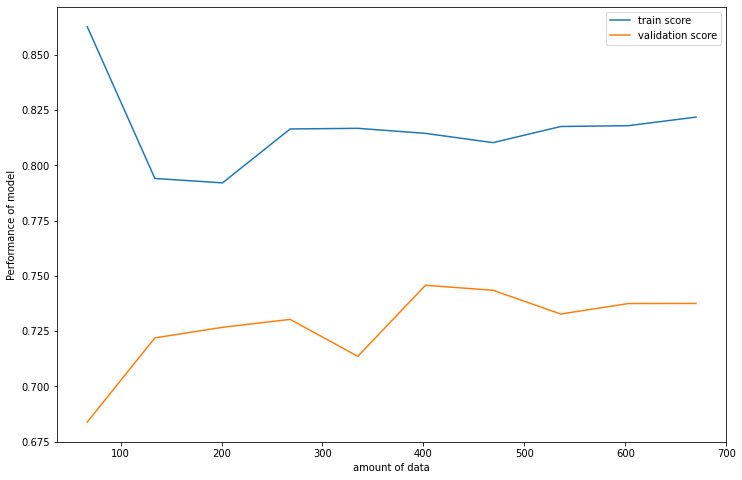

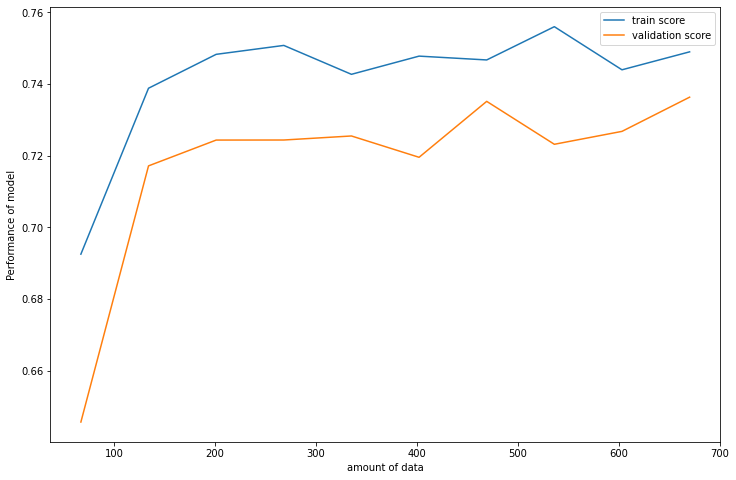

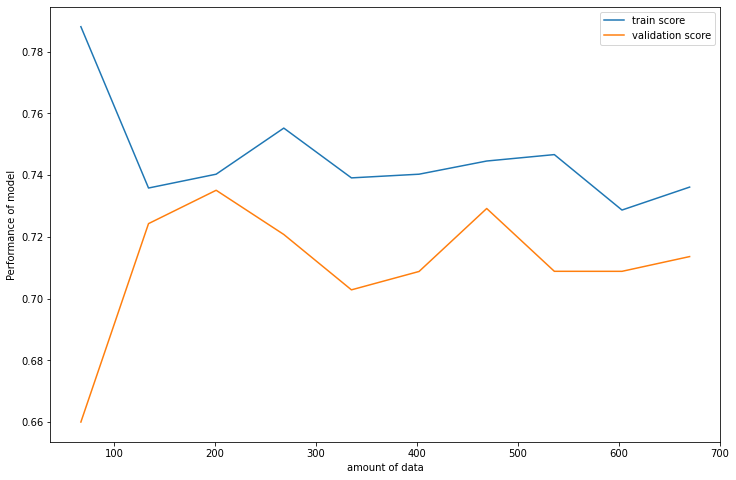

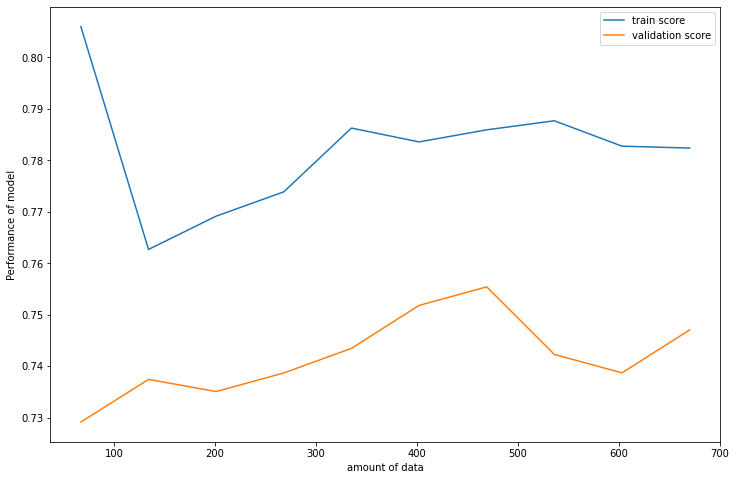

In [28]:
for names,model in dict_of_models.items() :
     print(names)
     classe.evaluation(model,X_train_3,y_train_3,X_test_3,y_test_3)

Optimisation des hyperparametres du modèle SVC et logistic

In [29]:
# optimiser SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
model = SVC()
classe.optimiseur(model,parameters,X_train_3,y_train_3)

best parameters  {'C': 10, 'kernel': 'rbf'}
accuracy : 0.8925719988594241


In [30]:
#bon parametre SVC
model = SVC(kernel= 'rbf', C = 1)
parameters = {'kernel':'rbf', 'C':1}

In [31]:
# optimiser LogisticRegression
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model = LogisticRegression()
#classe.optimiseur(model,parameters,X_train_3,y_train_3)

In [32]:
# bon parametre LogisticRegression
model = LogisticRegression(C= 0.1, penalty="l2")
parameters = {"C":0.1, "penalty":"l2"}


## 2) Feature selection 

In [33]:
# quel seuil choisir  avec X_test ?
variance = X_test_3.var(axis = 0)
# fig = pd.DataFrame(variance,index = X_test_3.columns ).plot(kind='bar',  
#         figsize=(20, 28), fontsize=18).get_figure()


# fig.savefig('/home/congo/Bureau/2022-m1-staps/rapports/motives/variance.pdf',dpi=500)

In [34]:
seuil = 0
X_train_3,X_test_3 = classe.selection_feature (X_test_3,X_train_3,seuil,col_total)

In [35]:

model = SVC(kernel= 'rbf', C = 1)
list_precision = []
list_recall = []
list_f1score = []
list_seuil = np.linspace(0,0.12,50)

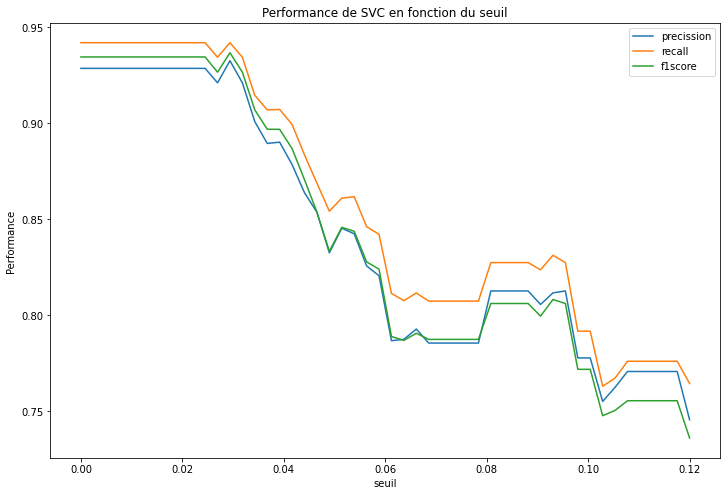

In [36]:

for seuil  in list_seuil :
    list_precision = classe.give_list_precision(model,X_test_3,y_test_3,X_train_3,y_train_3,seuil,col_total ,list_precision )
    list_recall = classe.give_list_recall(model,X_test_3,y_test_3,X_train_3,y_train_3,seuil,col_total ,list_recall )
    list_f1score = classe.give_list_f1score(model,X_test_3,y_test_3,X_train_3,y_train_3,seuil,col_total ,list_f1score)



plt.figure(figsize =(12,8))
plt.plot(list_seuil,list_precision,label = 'precission')
plt.plot(list_seuil,list_recall,label = 'recall')
plt.plot(list_seuil,list_f1score ,label = 'f1score')
plt.legend()
plt.title('Performance de SVC en fonction du seuil')
plt.xlabel('seuil')
plt.ylabel('Performance ')
plt.show()


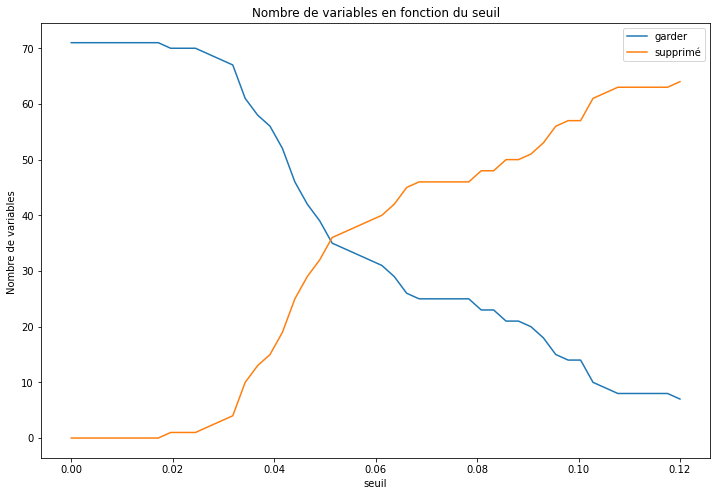

In [37]:
list_seuil = np.linspace(0,0.12,50)
list_col_sup = []
list_col_keep = []
for seuil in list_seuil :
    N_suprim , N_keep = classe.col_selection(X_test_3,seuil,col_total)
    list_col_sup.append(N_suprim)
    list_col_keep.append(N_keep)

plt.figure(figsize =(12,8))
plt.plot(list_seuil,list_col_keep,label = 'garder')
plt.plot(list_seuil,list_col_sup ,label = 'supprimé')
plt.legend()
plt.title('Nombre de variables en fonction du seuil')
plt.xlabel('seuil')
plt.ylabel('Nombre de variables ')
plt.show()

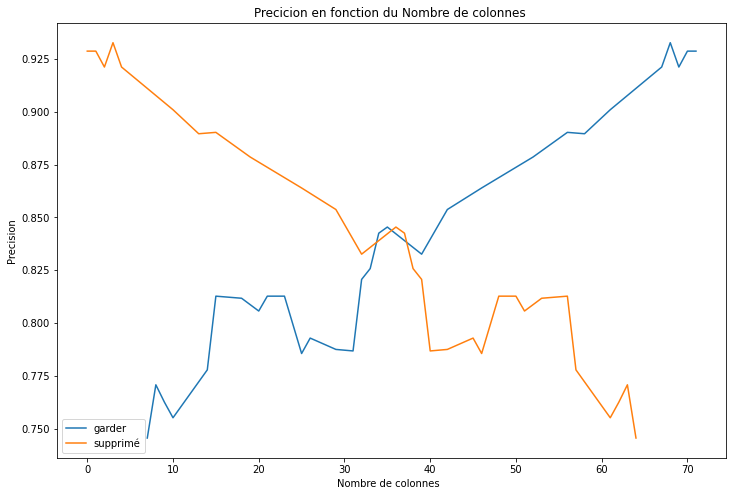

In [38]:
plt.figure(figsize =(12,8))
plt.plot(list_col_keep,list_precision,label = 'garder')
plt.plot(list_col_sup,list_precision ,label = 'supprimé')
plt.legend()
plt.title('Precicion en fonction du Nombre de colonnes ')
plt.ylabel('Precision')
plt.xlabel('Nombre de colonnes  ')
plt.show()

## 3) Tester le modele finale : SVC

In [39]:
seuil = 0
X_train_3,X_test_3 = classe.selection_feature (X_test_3,X_train_3,seuil,col_total)

In [40]:
model = SVC(kernel= 'rbf', C = 1)
parameters = {"C":1.0, "penalty":"l2"}

In [41]:
# bon parametre LogisticRegression
model = LogisticRegression(C= 0.1, penalty="l2")
parameters = {"C":0.1, "penalty":"l2"}

In [42]:
classe.fit_model(model,X_train_3,y_train_3)
y_pred_3_log = classe.prediction(model ,X_test_3)

In [43]:
classe.print_resulat(y_test_3,y_pred_3_log)

recall_score =  0.8958432798794244
f1-score =  0.888425925925926
precision_score =  0.89060593784632


confusion matrix 
            y_pred : 0  y_pred : 1  y_pred : 2
y_true: 0          79           4           0
y_true: 1          18          67           3
y_true: 2           0           1          38


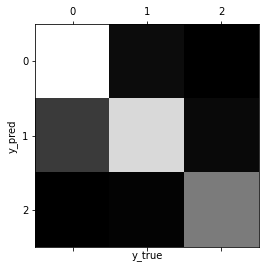

In [44]:
classe.matrice_confusion(y_test_3, y_pred_3_log)